# Wine quality prediction
## Linear regression

The project aims at creating a regression model to predict the quality of wine.

The project will hghlight how choosing the number of model variables impacts the model evaluation.

**We will choose variables to add in the model based on correlation between the variable and the target variable.**

**`Recalling from Coursera - IBM Data Sceince Professional Certificate,`** 

The data science process involves:
1) Business understanding.

2) Analytical Approach. 

3) Data requirement. 
* What are the required data and in what formate?

4) Data collection. 
* Know the sources of your data and eleminate useless data.

5) Data understanding.
* Descriptive statistics:
perform discriptive statistics, correlations, histograms
* Data quality:
Investigate missing values and missleading values.

6) Data preparation.
* Treat missing values 
* Treat categorical data
* Remove dublicated data

7) Modelling.

What is the purpose of data modelling (build discriptive or predictive models)
* Descriptive modells show how something works.
* Predictive models answer what can happen in  the future by using the past.

8) Evaluation. 
* Aims at assesing wether the model answer the question and if it needs to be adjusted.

9) Deployment.

10) Feedback.

<img src="IBM data science process.PNG">

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## `1.` Read the dataset 

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
wine = pd.read_csv('wine.csv')
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# get the total number of rows in the dataframe
n_rows = wine.shape[0]
print('number of rows is :', n_rows)

number of rows is : 25


c. The number of unique entries in the year column in the dataset.

In [4]:
# get the number of unique values in the year column
wine.Year.nunique()

25

d. Describe the dataset

In [5]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


e. get information on the dataset and dtypes

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
 6   FrancePop    25 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.5 KB


In [7]:
wine.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

no missing values in the dataset

## `2.`EDA

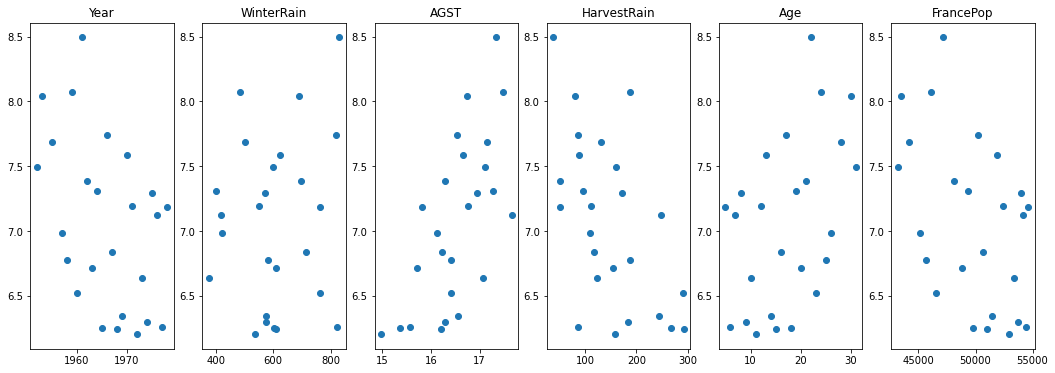

In [8]:
# plot scatter plots with log scale


cols = ['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age','FrancePop']
plt.figure(figsize = (18,6))
for i in range(len(cols)):
    plt.subplot(1,6,i+1)
    plt.scatter(wine[cols[i]], wine['Price'])
    plt.title(cols[i])

plt.show()


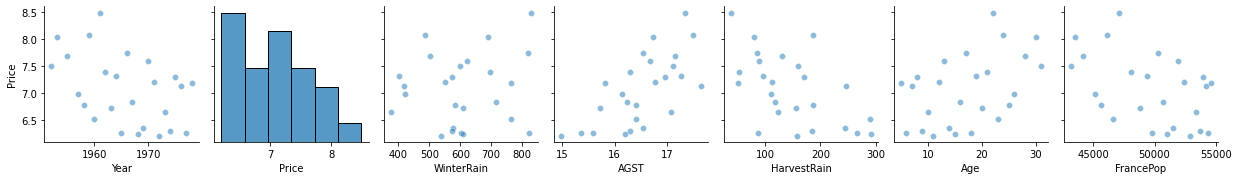

In [9]:
# pairplot for the price
sns.pairplot(wine, plot_kws={'alpha': 0.5, 'edgecolor': 'white'},  y_vars=['Price']);

Note that the **subplot** figure is similar to the **pairplot** figure outcome. However, the subplot allows for control of the figure size and the scale of x and y.

It looks like there is some sort of relation between wine price and age, AGST, year.

Lets investigae the correlation between these parameters and wine price (our target variable)

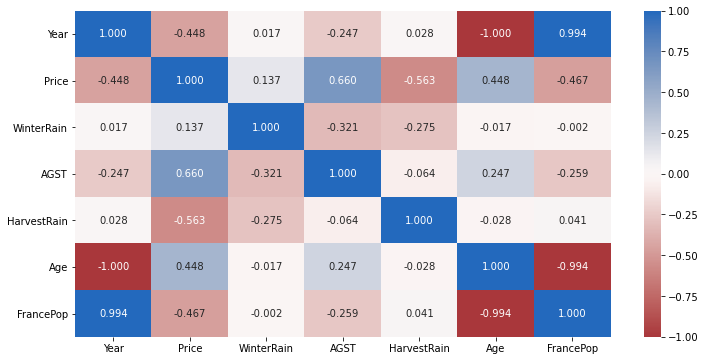

In [10]:
plt.figure(figsize = [12, 6])
sns.heatmap(wine.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()


Year and FrancePop are highlight correlated. Also, FrancePop and Age are highly correlated.


In [11]:
# create correlation plot

col_names = ('parameter', 'corr')
corr_df = pd.DataFrame(columns = col_names)

for i in ['Year', 'WinterRain', 'AGST', 'HarvestRain', 'Age','FrancePop']:

    correlation = wine[['Price', i]].corr()[i][0]
    corr_df = corr_df.append({'parameter': i ,'corr': correlation}, ignore_index = True)
corr_df


,parameter,corr
0,Year,-0.447768
1,WinterRain,0.136651
2,AGST,0.659563
3,HarvestRain,-0.563322
4,Age,0.447768
5,FrancePop,-0.466862


## `3.` Apply linear regression model 

In [12]:
df_results = pd.DataFrame(columns = ['Model', 'R_squared'])

### 2.a Linear regression model with one parameter

In [13]:
# import the statsmodels
import statsmodels.api as sm

# Define the intercept
wine['intercept'] = 1
# apply linear regression model 
lm = sm.OLS(wine['Price'],wine[['AGST', 'intercept']])
result1 = lm.fit()

In [14]:
# read the results summary 
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           0.000335
Time:                        12:58:27   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGST           0.6351      0.151      4.208      0.000       0.323       0.947
intercept     -3.4178      2.494     -1.371      0.184      -8.576       1.740
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
r1 = result1.rsquared

**R-squared** will always increase if you increase the number of independednt variables in the model.
**Adjusted R-squared** will decrease if you add an independant variable that does not help the model 

### 2.b linear regression model with two parameters

In [16]:
lm2 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain', 'intercept']])
result2 = lm2.fit()

In [17]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     26.59
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.35e-06
Time:                        12:58:27   Log-Likelihood:                -8.8461
No. Observations:                  25   AIC:                             23.69
Df Residuals:                      22   BIC:                             27.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.6026      0.111      5.415      0.000       0.372       0.833
HarvestRain    -0.0046      0.001     -4.525      0.000      -0.007      -0.002
intercept      -2.2027      1.854     -1.188      0.248      -6.048       1.643
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.096
Skew:                          -0.511   Prob(JB):                        0.578
Kurtosis:                       3.080   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
r2 = result2.rsquared

**Look now if we added an independant variable with positive correlation to the model instead the variable with negative correlation**. Meaning we replace HarvestRain with correlation of -0.563322 by Age of correlation 0.447768.

In [19]:
lm2_ = sm.OLS(wine['Price'],wine[['AGST','Age', 'intercept']])
result2_ = lm2_.fit()
result2_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     11.99
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           0.000301
Time:                        12:58:27   Log-Likelihood:                -14.994
No. Observations:                  25   AIC:                             35.99
Df Residuals:                      22   BIC:                             39.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGST           0.5630      0.147      3.841      0.001       0.259       0.867
Age            0.0257      0.013      1.994      0.059      -0.001       0.052
intercept     -2.6680      2.376     -1.123      0.274      -7.596       2.260
==============================================================================
Omnibus:                        1.474   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.138
Skew:                           0.294   Prob(JB):                        0.566
Kurtosis:                       2.137   Cond. No.                         621.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
r2_ = result2_.rsquared

**`Choose parameters with higher absolute value of the correlation to the target variable`**

**The addition of another variable to the regression model helped the R-squared to increase indicating the model performance is imporved**

### 2.c Add age to the model

In [21]:
lm3 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain','Age', 'intercept']])
result3 = lm3.fit()

In [22]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     26.34
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           2.60e-07
Time:                        12:58:27   Log-Likelihood:                -4.6965
No. Observations:                  25   AIC:                             17.39
Df Residuals:                      21   BIC:                             22.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.5323      0.100      5.348      0.000       0.325       0.739
HarvestRain    -0.0045      0.001     -5.183      0.000      -0.006      -0.003
Age             0.0251      0.009      2.875      0.009       0.007       0.043
intercept      -1.4778      1.627     -0.908      0.374      -4.862       1.907
==============================================================================
Omnibus:                        0.770   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.771
Skew:                          -0.211   Prob(JB):                        0.680
Kurtosis:                       2.251   Cond. No.                     4.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
r3 = result3.rsquared

### 2.d adding FrancePop then check WinterRain

In [24]:
lm4 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain','Age', 'FrancePop','intercept']])
result4 = lm4.fit()
print(result4.summary())
r4 = result4.rsquared

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     19.36
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.19e-06
Time:                        12:58:27   Log-Likelihood:                -4.4132
No. Observations:                  25   AIC:                             18.83
Df Residuals:                      20   BIC:                             24.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.5235      0.102      5.149      

In [25]:
lm4_ = sm.OLS(wine['Price'],wine[['AGST','HarvestRain','Age', 'WinterRain','intercept']])
result4_ = lm4_.fit()

In [26]:
result4_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           2.04e-07
Time:                        12:58:27   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.6072      0.099      6.152      0.000       0.401       0.813
HarvestRain    -0.0040      0.001     -4.652      0.000      -0.006      -0.002
Age             0.0239      0.008      2.956      0.008       0.007       0.041
WinterRain      0.0011      0.001      2.120      0.047    1.73e-05       0.002
intercept      -3.4300      1.766     -1.942      0.066      -7.114       0.254
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.041
Skew:                           0.034   Prob(JB):                        0.594
Kurtosis:                       2.003   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
r4_ = result4_.rsquared

### 2.e adding correlated parameters together

In [28]:
lm5 = sm.OLS(wine['Price'],wine[['AGST','HarvestRain','Age', 'WinterRain','FrancePop' ,'intercept']])
result5 = lm5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.04e-06
Time:                        12:58:27   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
AGST            0.6012      0.103      5.836      0.000       0.386       0.817
HarvestRain    -0.0040      0.001     -4.523      0.000      -0.006      -0.002
Age             0.0006      0.079      0.007      0.994      -0.165       0.166
WinterRain      0.0010      0.001      1.963      0.064   -6.89e-05       0.002
FrancePop   -4.953e-05      0.000     -0.297      0.770      -0.000       0.000
intercept      -0.4504     10.189     -0.044      0.965     -21.776      20.875
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     8.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model r_squared did not improve

* **F-statistic** in linear regression is comparing your produced linear model against a model that replaces your variables’ effect to 0,
* The **standard error** measure the variation of the coeffiecent.
* The **t value** is the coefficent divided by the standard error.
It will be negative if the estimate is negative and positive if the estimate is positive.
The larger the absolute value of the t value, the more likely the coefficient is to be significant.

* **P**: a measurement of significance of the selected coefficent to the model through highlighting how likely the result produced by chance. P value of 0.1, means there is 10% chance the results are produced by chance. We look for independent variables with small p-value (high siginificance) less than 0.05.
* **Skew** is a measurement of symmetry in our data, with 0 being perfect symmetry.
* **[0.025 - 0.975]** measurements of values in the coefficent within 95% of the data, or within two standard deviations. Outside of these values the data points are outliers. Note that these values are the same even if we cahnge the model because they depend on the distribution of the parameter (coefficent).

In [29]:
#get information on the methodsw that can be implemented on the results
help(result5)

Help on RegressionResultsWrapper in module statsmodels.regression.linear_model object:

class RegressionResultsWrapper(statsmodels.base.wrapper.ResultsWrapper)
 |  RegressionResultsWrapper(results)
 |  
 |  Class which wraps a statsmodels estimation Results class and steps in to
 |  reattach metadata to results (if available)
 |  
 |  Method resolution order:
 |      RegressionResultsWrapper
 |      statsmodels.base.wrapper.ResultsWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  conf_int(self, alpha=0.05, cols=None)
 |      conf_int(self, alpha=0.05, cols=None)
 |      
 |      Compute the confidence interval of the fitted parameters.
 |      
 |      Parameters
 |      ----------
 |      alpha : float, optional
 |          The `alpha` level for the confidence interval. The default
 |          `alpha` = .05 returns a 95% confidence interval.
 |      cols : array_like, optional
 |          Columns to included in returned confidence intervals.
 |      
 |      Retu

So this model looks pretty good,
but if we look at our R-squared, we
can see that it dropped to 0.75.
The model that includes Age has an R-squared of 0.83.
So if we had removed Age and FrancePopulation
at the same time, we would have missed a significant variable,
and the R-squared of our final model would have been lower.
So why didn't we keep FrancePopulation
instead of Age?
Well, we expect Age to be significant.
Older wines are typically more expensive,
so Age makes more intuitive sense in our model.

**The best model we have as its R-squared is 0.83**

## `4.` compare each model to the original price data

The target is to highlight how the models compare to the orginal data and justify the selection of the model with the lowest R-squared

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa 

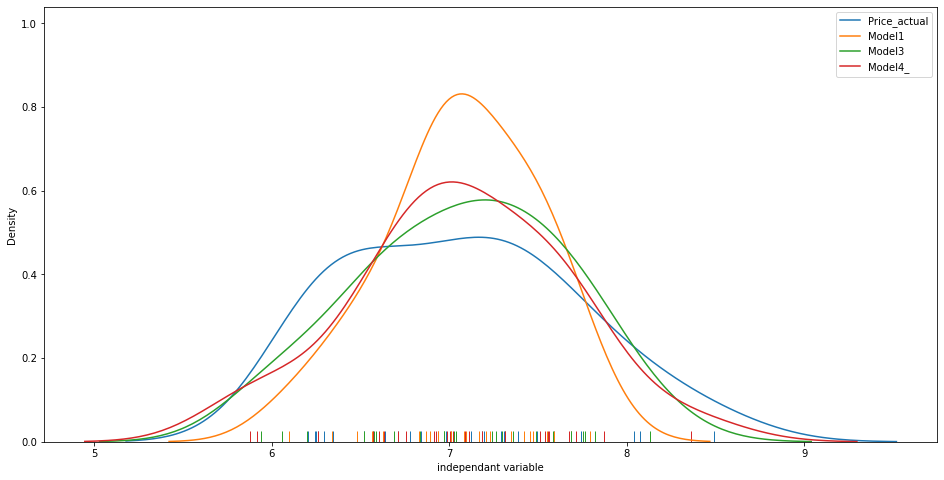

In [30]:
# plot distribution plot


wine['yhat1'] = result1.predict(wine[['AGST', 'intercept']]).tolist()
wine['yhat3'] = result3.predict(wine[['AGST','HarvestRain','Age', 'intercept']]).tolist()
wine['yhat4_'] = result4_.predict(wine[['AGST','HarvestRain','Age', 'WinterRain','intercept']]).tolist()

plt.figure(figsize=(16,8))
sns.distplot(wine['Price'], hist=False, rug=True)
sns.distplot(wine['yhat1'], hist=False, rug=True)
sns.distplot(wine['yhat3'], hist=False, rug=True)
sns.distplot(wine['yhat4_'], hist=False, rug=True)


plt.legend(['Price_actual', 'Model1', 'Model3', 'Model4_'])
plt.xlabel('independant variable')
plt.show()

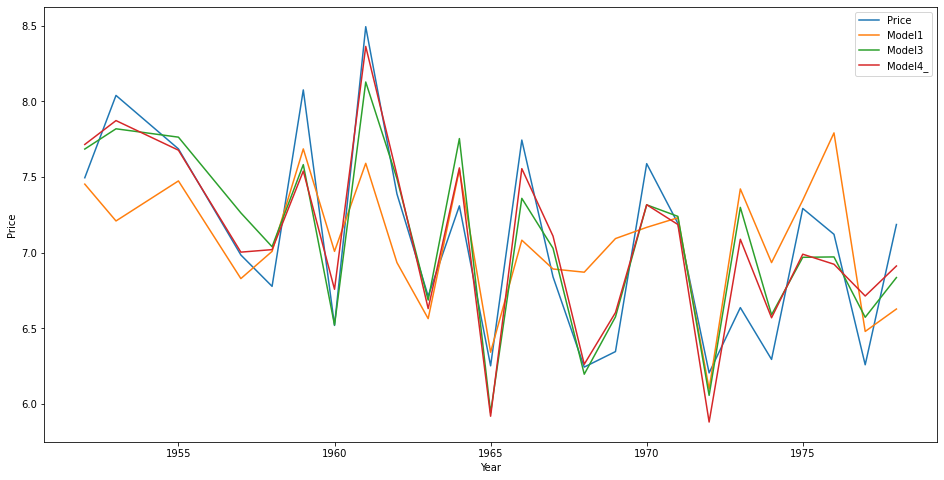

In [31]:
# show the linear trend of actual price data and different models
plt.figure(figsize=(16,8))
sns.lineplot(data = wine, x='Year', y='Price') 
sns.lineplot(data = wine, x='Year', y='yhat1') 
sns.lineplot(data = wine, x='Year', y='yhat3') 
sns.lineplot(data = wine, x='Year', y='yhat4_') 
plt.legend(['Price', 'Model1', 'Model3', 'Model4_'])
plt.show()

## `4.` Making predictions

In [32]:
## Load the testing data 
wine_test = pd.read_csv('wine_test.csv')
wine_test['intercept'] = 1
wine_test = wine_test[['AGST','HarvestRain','WinterRain','Age','FrancePop', 'intercept']]

In [33]:
wine_test.head()

,AGST,HarvestRain,WinterRain,Age,FrancePop,intercept
0,16.1667,122,717,4,54835.832,1
1,16.0000,74,578,3,55110.236,1


In [34]:
wine_test['price_predicted_1'] = result1.predict(wine_test[['AGST', 'intercept']]).tolist()
wine_test['price_predicted_2'] = result2.predict(wine_test[['AGST','HarvestRain', 'intercept']]).tolist()
wine_test['price_predicted_3'] = result3.predict(wine_test[['AGST','HarvestRain','WinterRain','Age','FrancePop', 'intercept']]).tolist()
wine_test['price_predicted_4'] = result4.predict(wine_test[['HarvestRain','WinterRain','intercept']]).tolist()
wine_test['price_predicted_5'] = result5.predict(wine_test[['AGST','HarvestRain','WinterRain','intercept']]).tolist()

ValueError: shapes (2,6) and (4,) not aligned: 6 (dim 1) != 4 (dim 0)

In [ ]:
wine_test.head()

In [ ]:
prediction_columns =wine_test.columns.tolist()[6:]

In [ ]:
wine_test[prediction_columns].plot()